In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('IRIS.csv')  

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.shape

(150, 5)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

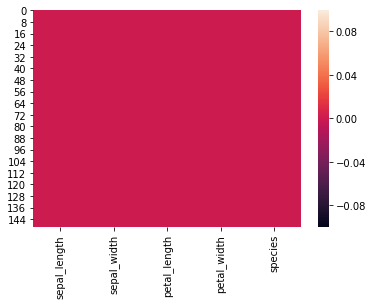

In [6]:

sns.heatmap(df.isna())

In [7]:
df.duplicated().sum()

3

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis:

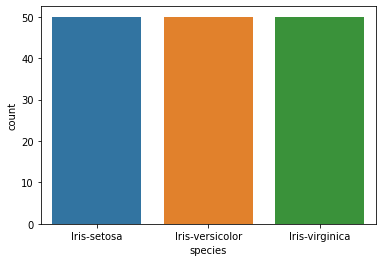

In [11]:
sns.countplot(df.species)

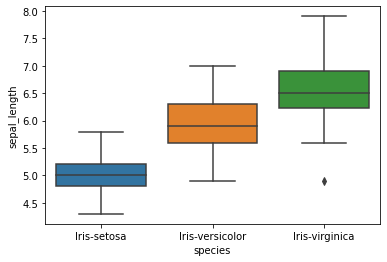

In [12]:
sns.boxplot(df.species,df.sepal_length)

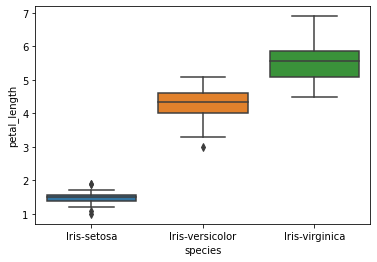

In [13]:
sns.boxplot(df.species,df.petal_length)

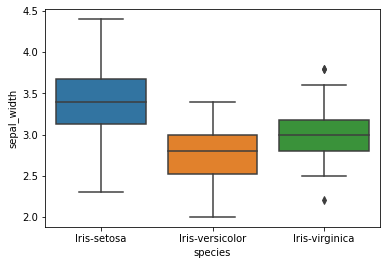

In [14]:
sns.boxplot(df.species,df.sepal_width)

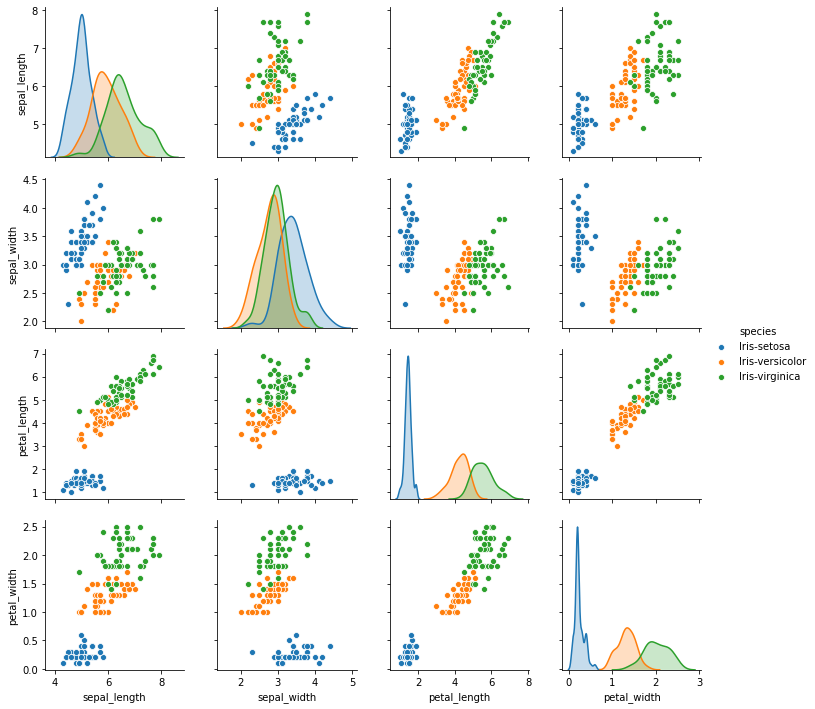

In [15]:
sns.pairplot(df,hue='species')

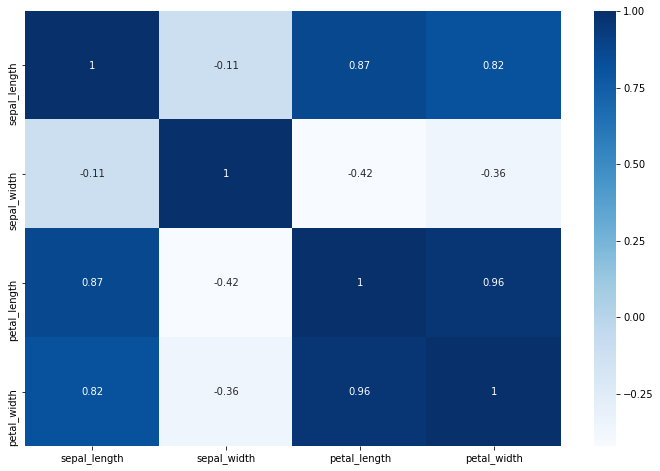

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [17]:
#Scaling the data:

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [19]:
from sklearn.preprocessing import LabelEncoder 

In [20]:
labelencoder= LabelEncoder()

In [21]:
target = pd.get_dummies(df['species'])

In [22]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
y=target
X=df.drop('species',axis=1)

In [24]:
X.shape,y.shape

((150, 4), (150, 3))

In [25]:
#Train-Test Split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [27]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [28]:
X_train

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

In [29]:
#Defining and building the model:

In [30]:
import keras

Using TensorFlow backend.


In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [40]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [42]:
model=Sequential()
model.add(Dense(output_dim=100,input_dim=4))
model.add(Activation("relu"))
model.add(Dense(output_dim=3))
model.add(Activation("softmax"))

In [44]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [59]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), nb_epoch=400,batch_size=40)

Train on 120 samples, validate on 30 samples
Epoch 1/400
120/120 [==============================] - 0s 125us/step - loss: 0.0539 - accuracy: 0.9833 - val_loss: 0.0751 - val_accuracy: 0.9667
Epoch 2/400
120/120 [==============================] - 0s 117us/step - loss: 0.0539 - accuracy: 0.9833 - val_loss: 0.0751 - val_accuracy: 0.9667
Epoch 3/400
120/120 [==============================] - 0s 117us/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.0751 - val_accuracy: 0.9667
Epoch 4/400
120/120 [==============================] - 0s 108us/step - loss: 0.0539 - accuracy: 0.9833 - val_loss: 0.0751 - val_accuracy: 0.9667
Epoch 5/400
120/120 [==============================] - 0s 108us/step - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.0751 - val_accuracy: 0.9667
Epoch 6/400
120/120 [==============================] - 0s 117us/step - loss: 0.0540 - accuracy: 0.9833 - val_loss: 0.0751 - val_accuracy: 0.9667
Epoch 7/400
120/120 [==============================] - 0s 108us/step - loss: 0.0538 -

120/120 [==============================] - 0s 133us/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0753 - val_accuracy: 0.9667
Epoch 57/400
120/120 [==============================] - 0s 192us/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0753 - val_accuracy: 0.9667
Epoch 58/400
120/120 [==============================] - 0s 133us/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0753 - val_accuracy: 0.9667
Epoch 59/400
120/120 [==============================] - 0s 133us/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0753 - val_accuracy: 0.9667
Epoch 60/400
120/120 [==============================] - 0s 125us/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0753 - val_accuracy: 0.9667
Epoch 61/400
120/120 [==============================] - 0s 133us/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0753 - val_accuracy: 0.9667
Epoch 62/400
120/120 [==============================] - 0s 175us/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0753 - val_accuracy

120/120 [==============================] - 0s 275us/step - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.0756 - val_accuracy: 0.9667
Epoch 113/400
120/120 [==============================] - 0s 117us/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0756 - val_accuracy: 0.9667
Epoch 114/400
120/120 [==============================] - 0s 133us/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0756 - val_accuracy: 0.9667
Epoch 115/400
120/120 [==============================] - 0s 217us/step - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.0756 - val_accuracy: 0.9667
Epoch 116/400
120/120 [==============================] - 0s 150us/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0756 - val_accuracy: 0.9667
Epoch 117/400
120/120 [==============================] - 0s 183us/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0756 - val_accuracy: 0.9667
Epoch 118/400
120/120 [==============================] - 0s 133us/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0756 - val_ac

Epoch 168/400
120/120 [==============================] - 0s 142us/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.0757 - val_accuracy: 0.9667
Epoch 169/400
120/120 [==============================] - 0s 158us/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.0757 - val_accuracy: 0.9667
Epoch 170/400
120/120 [==============================] - 0s 133us/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.0757 - val_accuracy: 0.9667
Epoch 171/400
120/120 [==============================] - 0s 125us/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.0757 - val_accuracy: 0.9667
Epoch 172/400
120/120 [==============================] - 0s 133us/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.0757 - val_accuracy: 0.9667
Epoch 173/400
120/120 [==============================] - 0s 117us/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.0757 - val_accuracy: 0.9667
Epoch 174/400
120/120 [==============================] - 0s 125us/step - loss: 0.0528 - accuracy: 0.9833 - val_loss: 0

120/120 [==============================] - 0s 167us/step - loss: 0.0527 - accuracy: 0.9833 - val_loss: 0.0758 - val_accuracy: 0.9667
Epoch 224/400
120/120 [==============================] - 0s 150us/step - loss: 0.0526 - accuracy: 0.9833 - val_loss: 0.0758 - val_accuracy: 0.9667
Epoch 225/400
120/120 [==============================] - 0s 150us/step - loss: 0.0527 - accuracy: 0.9833 - val_loss: 0.0758 - val_accuracy: 0.9667
Epoch 226/400
120/120 [==============================] - 0s 167us/step - loss: 0.0527 - accuracy: 0.9833 - val_loss: 0.0758 - val_accuracy: 0.9667
Epoch 227/400
120/120 [==============================] - 0s 117us/step - loss: 0.0528 - accuracy: 0.9833 - val_loss: 0.0758 - val_accuracy: 0.9667
Epoch 228/400
120/120 [==============================] - 0s 150us/step - loss: 0.0527 - accuracy: 0.9833 - val_loss: 0.0758 - val_accuracy: 0.9667
Epoch 229/400
120/120 [==============================] - 0s 133us/step - loss: 0.0525 - accuracy: 0.9833 - val_loss: 0.0758 - val_ac

120/120 [==============================] - 0s 375us/step - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.0759 - val_accuracy: 0.9667
Epoch 279/400
120/120 [==============================] - 0s 125us/step - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.0759 - val_accuracy: 0.9667
Epoch 280/400
120/120 [==============================] - 0s 142us/step - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.0759 - val_accuracy: 0.9667
Epoch 281/400
120/120 [==============================] - 0s 117us/step - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 282/400
120/120 [==============================] - 0s 108us/step - loss: 0.0522 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 283/400
120/120 [==============================] - 0s 450us/step - loss: 0.0524 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 284/400
120/120 [==============================] - 0s 150us/step - loss: 0.0525 - accuracy: 0.9833 - val_loss: 0.0760 - val_ac

120/120 [==============================] - 0s 541us/step - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 334/400
120/120 [==============================] - 0s 142us/step - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 335/400
120/120 [==============================] - 0s 133us/step - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 336/400
120/120 [==============================] - 0s 516us/step - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 337/400
120/120 [==============================] - 0s 133us/step - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 338/400
120/120 [==============================] - 0s 125us/step - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 339/400
120/120 [==============================] - 0s 100us/step - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.0760 - val_ac

120/120 [==============================] - 0s 117us/step - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 389/400
120/120 [==============================] - 0s 133us/step - loss: 0.0517 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 390/400
120/120 [==============================] - 0s 117us/step - loss: 0.0517 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 391/400
120/120 [==============================] - 0s 125us/step - loss: 0.0518 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9667
Epoch 392/400
120/120 [==============================] - 0s 108us/step - loss: 0.0518 - accuracy: 0.9833 - val_loss: 0.0761 - val_accuracy: 0.9667
Epoch 393/400
120/120 [==============================] - 0s 167us/step - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.0761 - val_accuracy: 0.9667
Epoch 394/400
120/120 [==============================] - 0s 217us/step - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.0761 - val_ac

In [54]:
score = model.evaluate(X_test, y_test, verbose = 0)

In [55]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0750613883137703
Test accuracy: 0.9666666388511658


In [56]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [71]:
y_test = y_test.to_numpy()

In [72]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [73]:
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [75]:

df_result = pd.DataFrame.from_dict(history.history)

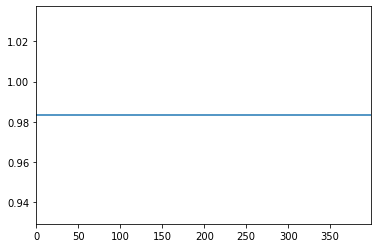

In [77]:
df_result['accuracy'].plot()

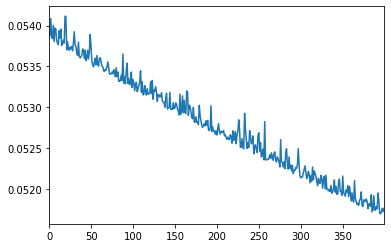

In [79]:
df_result['loss'].plot()

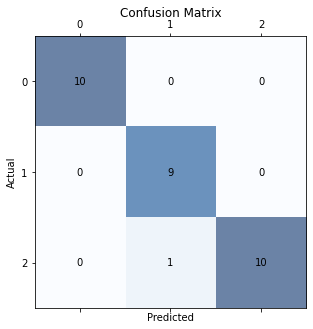

In [80]:

cm=confusion_matrix(y_test_class,y_pred_class)
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.6)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()